# NETWORK FAILURE  PREDICTION MODEL

Steps to Follow When Perfoming Time series Analysis 

1.Data Collection
2.Data Exploration and Assesement
3.Data Preprocessing and Cleaning
4.Stationarity
5.Choosing Model
6.Model Fitting
7.Forecasting
8.Model Evaluation


In [1]:
# ----------------------------------------------Importing modules that are neccessary for the Prediction--------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import Series
from sklearn.utils import resample # for sampling
#----------------------------------------------STEP 1 DATA COLLECTION-----------------------------------------------------------
df = pd.read_csv('/home/takudzwa/Documents/Projects/WebApp-Projects/data_set/Dataset-Unicauca-Version2-87Atts.csv')
df.shape

(1048575, 87)

In [17]:
#---------------------------------------------DATA EXPLORATION AND ASSESEMENT(DATA ANALAYSIS)-------------------------------------
print('Head of the Data Set',df.head(n=5))
print('Tail of the Data Set',df.tail(n=5))


Head of the Data Set                                      Flow.ID       Source.IP  Source.Port  \
0    172.19.1.46-192.168.245.10-52422-3128-6     172.19.1.46        52422   
1    172.19.1.46-192.168.245.10-52422-3128-6  192.168.245.10         3128   
2       10.200.7.217-50.31.185.39-38848-80-6    50.31.185.39           80   
3       10.200.7.217-50.31.185.39-38848-80-6    50.31.185.39           80   
4  192.168.72.43-192.168.245.10-55961-3128-6   192.168.72.43        55961   

   Destination.IP  Destination.Port  Protocol           Timestamp  \
0  192.168.245.10              3128         6  26/04/201711:11:17   
1     172.19.1.46             52422         6  26/04/201711:11:17   
2    10.200.7.217             38848         6  26/04/201711:11:17   
3    10.200.7.217             38848         6  26/04/201711:11:17   
4  192.168.245.10              3128         6  26/04/201711:11:17   

   Flow.Duration  Total.Fwd.Packets  Total.Backward.Packets  ...  Active.Std  \
0          45523     

In [6]:
#Showing the basic statistics of the data
df.describe()

,Source.Port,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.569082e+04,1.291848e+04,6.005119e+00,2.112849e+07,5.465246e+01,6.140241e+01,3.470609e+04,9.915793e+04,4.943220e+02,7.226746e+00,...,2.590404e+01,2.470705e+05,1.443851e+05,4.252302e+05,1.441728e+05,7.093360e+06,1.115743e+06,8.076663e+06,6.058889e+06,9.611647e+01
std,2.267147e+04,2.116656e+04,3.248193e-01,3.711712e+07,9.892436e+02,1.294176e+03,1.575671e+06,3.023639e+06,1.011026e+03,8.181314e+01,...,6.029654e+00,2.018038e+06,1.048899e+06,2.744389e+06,1.809586e+06,1.598250e+07,4.398582e+06,1.764365e+07,1.497405e+07,5.484653e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
25%,3.128000e+03,4.430000e+02,6.000000e+00,5.640000e+02,2.000000e+00,1.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+01
50%,4.698400e+04,3.128000e+03,6.000000e+00,3.133100e+05,5.000000e+00,4.000000e+00,3.140000e+02,6.900000e+01,1.660000e+02,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.260000e+02
75%,5.306000e+04,3.128000e+03,6.000000e+00,1.992396e+07,1.500000e+01,1.500000e+01,1.702000e+03,3.876000e+03,5.970000e+02,6.000000e+00,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+02
max,6.553400e+04,6.553400e+04,1.700000e+01,1.200000e+08,3.286950e+05,5.421960e+05,6.780236e+08,1.345796e+09,2.982000e+04,1.606000e+04,...,4.800000e+01,1.138933e+08,7.225154e+07,1.138933e+08,1.138933e+08,1.200000e+08,7.516046e+07,1.200000e+08,1.200000e+08,2.220000e+02


In [2]:
#Checking for missing values 
df_missing = df.isnull()
print(df_missing.sum()) # shows the sum of all missing values
df_new = df.dropna() # Incase there are any missing values we drop


Flow.ID             0
Source.IP           0
Source.Port         0
Destination.IP      0
Destination.Port    0
                   ..
Idle.Max            0
Idle.Min            0
Label               0
L7Protocol          0
ProtocolName        0
Length: 87, dtype: int64


ACK


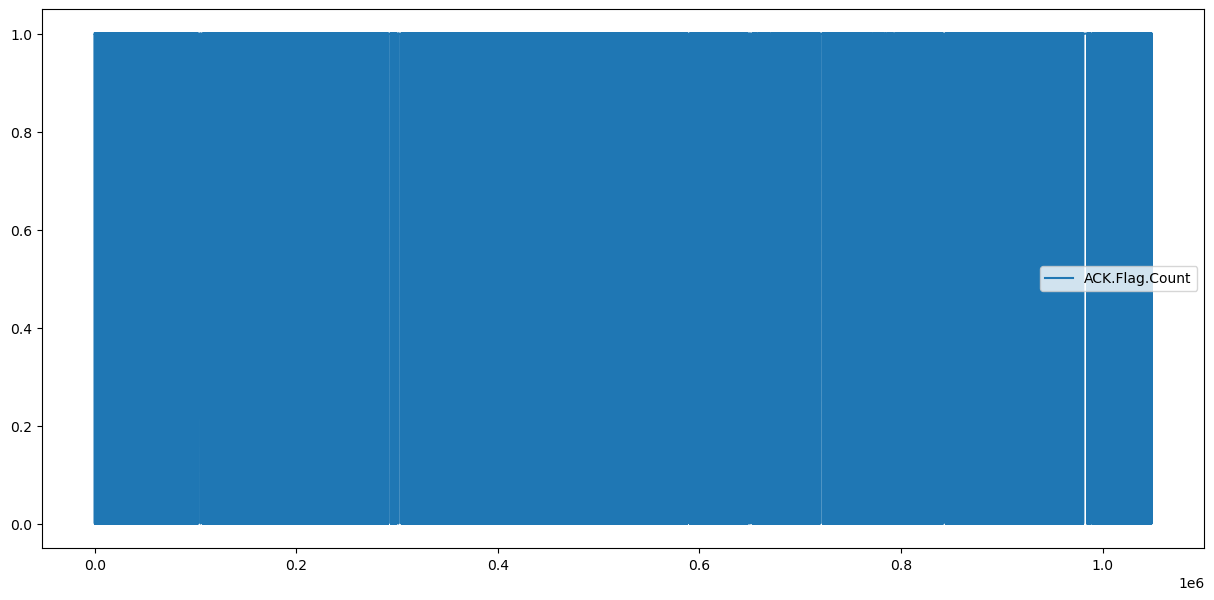

In [7]:
#visualizing the data
df_plot = df[['Timestamp','ACK.Flag.Count']]
df_plot.plot(figsize =(15,7))
print('ACK')
plt.show()

Ratio


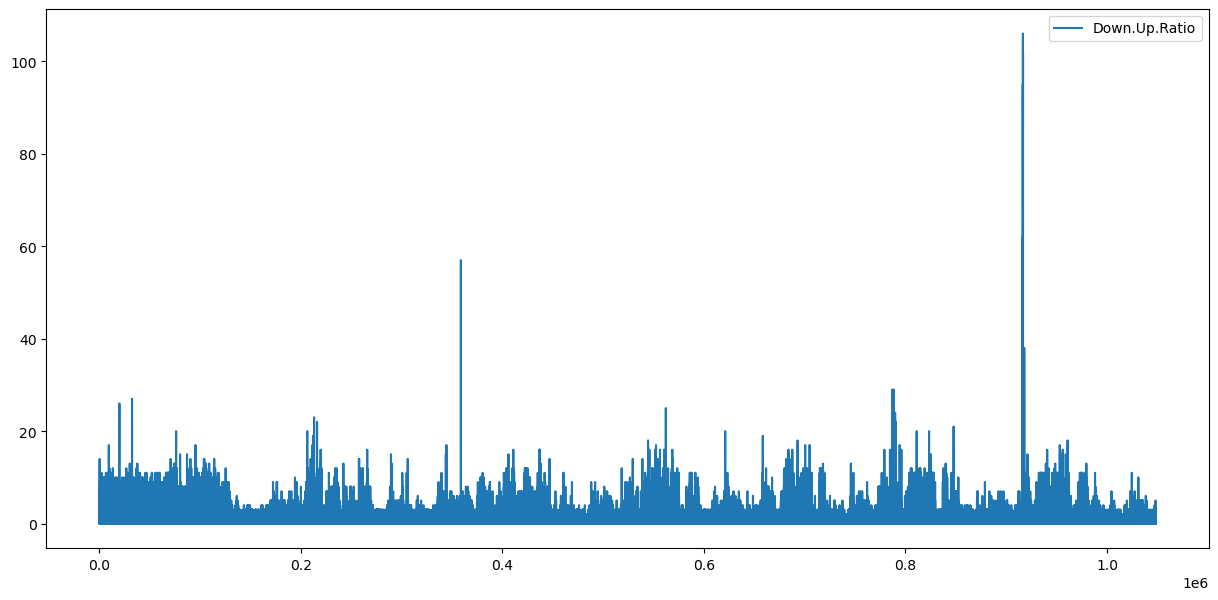

In [3]:
#visualizing the data
df_plot = df[['Timestamp','Down.Up.Ratio']]
df_plot.plot(figsize =(15,7))
print('Ratio')
plt.show()

In [4]:
#-----------------------------------------------------DATA PREPROCESSING AND CLEANING--------------------------------------------------
#1. Cleaning
#Selecting columns that are not going to be used in the analyis and dropping the one not required
#df_new.info() #Displating all the 84 Columns

In [5]:
#Data Preprocessing
#converting into the correct format

df_new['Timestamp'] = pd.to_datetime(df_new['Timestamp'],format='%d/%m/%Y%H:%M:%S')
df_new['Time'] = df_new['Timestamp'].dt.date
df_new['Date'] =df_new['Timestamp'].dt.time
# df_new.set_index('Time')
# print(df_new.info())
# print(df_new.index.name)
df_drop = df_new[['Flow.ID','Timestamp','Date','Time','Source.IP','Source.Port','Destination.IP',
                  'Destination.Port','Flow.Duration','Protocol','ACK.Flag.Count'
                 ,'Down.Up.Ratio','ProtocolName']]
df_drop.shape


(1048575, 13)

In [15]:
df_drop.head(n=3)


,Flow.ID,Timestamp,Date,Time,Source.IP,Source.Port,Destination.IP,Destination.Port,Flow.Duration,Protocol,ACK.Flag.Count,Down.Up.Ratio,ProtocolName
0,172.19.1.46-192.168.245.10-52422-3128-6,2017-04-26 11:11:17,11:11:17,2017-04-26,172.19.1.46,52422,192.168.245.10,3128,45523,6,1,2,HTTP_PROXY
1,172.19.1.46-192.168.245.10-52422-3128-6,2017-04-26 11:11:17,11:11:17,2017-04-26,192.168.245.10,3128,172.19.1.46,52422,1,6,1,0,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,2017-04-26 11:11:17,11:11:17,2017-04-26,50.31.185.39,80,10.200.7.217,38848,1,6,1,0,HTTP


In [18]:
#Data Preprocessing
df_drop.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Flow.ID           1048575 non-null  object        
 1   Timestamp         1048575 non-null  datetime64[ns]
 2   Date              1048575 non-null  object        
 3   Time              1048575 non-null  object        
 4   Source.IP         1048575 non-null  object        
 5   Source.Port       1048575 non-null  int64         
 6   Destination.IP    1048575 non-null  object        
 7   Destination.Port  1048575 non-null  int64         
 8   Flow.Duration     1048575 non-null  int64         
 9   Protocol          1048575 non-null  int64         
 10  ACK.Flag.Count    1048575 non-null  int64         
 11  Down.Up.Ratio     1048575 non-null  int64         
 12  ProtocolName      1048575 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(6)


In [17]:
#changing data type and setting index
#df_drop['Timestamp'] = pd.to_datetime(df_drop['Timestamp'])
#df_drop = df_drop.set_index('Timestamp').resample('D').mean()
#df_drop.info()

In [37]:
df_drop[['Flow.ID']].value_counts()

Flow.ID                                   
192.168.10.58-10.200.7.4-50555-3128-6         199
192.168.180.14-10.200.7.8-52792-3128-6        192
192.168.180.14-10.200.7.5-51613-3128-6        176
192.168.180.16-192.168.245.10-55146-3128-6    127
172.16.255.183-10.200.7.4-53-52931-17         115
                                             ... 
179.1.4.244-10.200.7.194-443-40875-6            1
179.1.4.244-10.200.7.194-443-40876-6            1
179.1.4.244-10.200.7.194-443-41656-6            1
179.1.4.244-10.200.7.194-443-42110-6            1
192.168.10.117-10.200.7.8-52508-3128-6          1
Name: count, Length: 442483, dtype: int64

In [28]:
#Checking for Resampling or not
df_drop['Down.Up.Ratio'].value_counts()

Down.Up.Ratio
0      485456
1      361490
2      100256
3       40119
4       25503
5       21249
6        8427
7        2962
8        1279
9         834
11        381
10        296
12        157
13         38
14         34
15         22
16         21
17         13
20          6
19          4
18          4
21          3
26          2
23          2
22          2
29          2
24          2
95          1
30          1
102         1
106         1
61          1
25          1
62          1
40          1
27          1
57          1
38          1
Name: count, dtype: int64

In [6]:
df_drop['ACK.Flag.Count'].value_counts()

ACK.Flag.Count
1    628114
0    420461
Name: count, dtype: int64

In [6]:
#sampling 

majority_class = df_drop['ACK.Flag.Count'].mode()[0]
minority_class = 1 - majority_class

print(f'minority classs {minority_class}, majority class {majority_class}')

# ----------------------------------- Downsample majority class to match minority-----------------------------------------
# Downsample majority class to match minority class size
majority_downsampled = resample(
    df_drop[df_drop['ACK.Flag.Count'] == majority_class],
    replace=False,  # Avoid duplicates
    n_samples=len(df_drop[df_drop['ACK.Flag.Count'] == minority_class]),
    random_state=42  # Set random seed for reproducibility
)

# Combine downsampled majority with minority class
downsampled_df = pd.concat([majority_downsampled, df_drop[df_drop['ACK.Flag.Count'] == minority_class]])

print(downsampled_df['ACK.Flag.Count'].value_counts())



minority classs 0, majority class 1
ACK.Flag.Count
1    420461
0    420461
Name: count, dtype: int64


In [8]:
#slecting only data for single router clients to work with
df_drop_new = downsampled_df.loc[df_drop['Source.IP']== '10.200.7.4']
#Exporing the dataset to Djnago


In [10]:
#Exporing the dataset to Djnago
df_drop_new.to_csv('/home/takudzwa/Documents/Projects/WebApp-Projects/Time_series/web_application/PredictionModel/NetworkFalure.csv',index=False)
df_drop_new.shape

(26073, 13)

In [11]:
#re-importing the dataset
df_predict = pd.read_csv('/home/takudzwa/Documents/Projects/WebApp-Projects/Time_series/web_application/PredictionModel/NetworkFalure.csv')
df_predict.head(n=1)




,Flow.ID,Timestamp,Date,Time,Source.IP,Source.Port,Destination.IP,Destination.Port,Flow.Duration,Protocol,ACK.Flag.Count,Down.Up.Ratio,ProtocolName
0,192.168.60.15-10.200.7.4-49891-3128-6,2017-04-26 11:17:45,11:17:45,2017-04-26,10.200.7.4,3128,192.168.60.15,49891,3301,6,1,1,HTTP


In [11]:
df_predict[['Flow.ID']].value_counts()


Flow.ID                               
192.168.10.58-10.200.7.4-50555-3128-6     138
172.16.255.183-10.200.7.4-53-52931-17     110
192.168.180.16-10.200.7.4-45510-3128-6     41
192.168.42.68-10.200.7.4-1479-3128-6       38
10.200.7.4-10.230.1.73-3128-63559-6        29
                                         ... 
192.168.150.16-10.200.7.4-49827-3128-6      1
192.168.150.16-10.200.7.4-49823-3128-6      1
192.168.150.16-10.200.7.4-49822-3128-6      1
192.168.150.16-10.200.7.4-49821-3128-6      1
192.168.90.98-10.200.7.4-58304-3128-6       1
Name: count, Length: 13726, dtype: int64

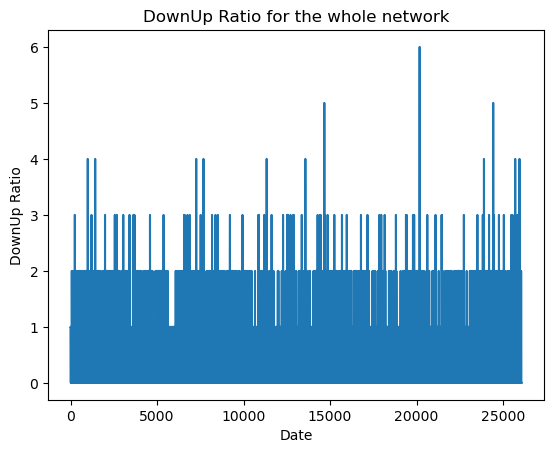

In [13]:
df_Ratio = df_predict['Down.Up.Ratio']
df_time = df_predict['Timestamp']
plt.plot(df_Ratio)
plt.title('DownUp Ratio for the whole network')
plt.xlabel('Date')
plt.ylabel('DownUp Ratio')
plt.show()
#plot of ack  and up down for the whole network over a period of time
#plot of 1 customer up down ration over a period of time

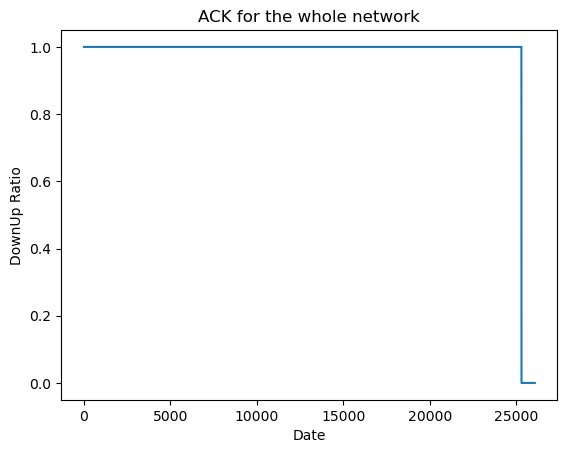

In [14]:
df_ack = df_predict['ACK.Flag.Count']
df_time = df_predict['Timestamp']
plt.plot(df_ack)
plt.title('ACK for the whole network')
plt.xlabel('Date')
plt.ylabel('DownUp Ratio')
plt.show()

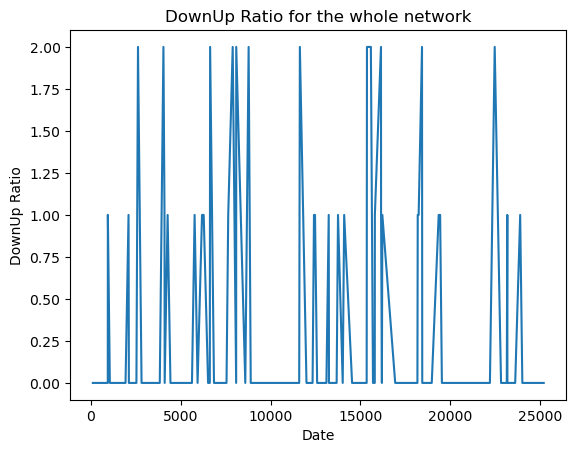

In [13]:
#Plotting for specific customeer
ip ='192.168.42.68'
#ip ='172.16.255.183'
#ip='192.168.10.58'
#print(df_predict)
#print(df_predict['Destination.IP'].value_counts())
df_customer = df_predict.loc[df_predict['Destination.IP'] == ip ]
df_Ratio = df_customer['Down.Up.Ratio']
df_time = df_customer['Timestamp']
plt.plot(df_Ratio)
plt.title('DownUp Ratio for the whole network')
plt.xlabel('Date')
plt.ylabel('DownUp Ratio')
plt.show()

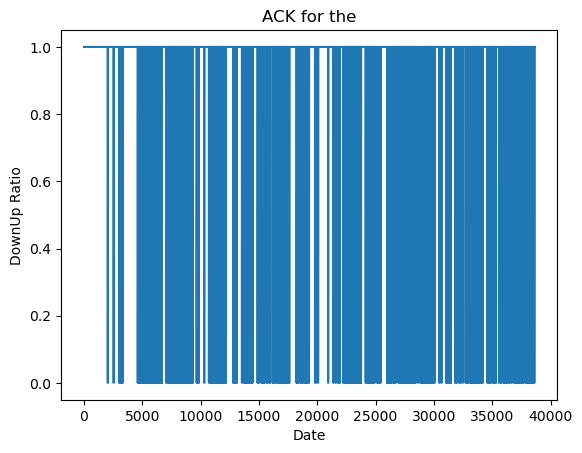

In [59]:
#Plotting for specific customeer
#ip ='192.168.42.68'
ip ='172.16.255.183'
#ip='192.168.10.58'
#print(df_predict)
#print(df_predict['Destination.IP'].value_counts())
df_customer = df_predict.loc[df_predict['Destination.IP'] == ip ]
df_ack = df_predict['ACK.Flag.Count']
df_time = df_customer['Timestamp']
plt.plot(df_ack)
plt.title('ACK for the')
plt.xlabel('Date')
plt.ylabel('DownUp Ratio')
plt.show()

In [1]:
#-------------------------------------------------CHECKING FOR STATIONERITY------------------------------------------------------------
from statsmodels.tsa.stattools import adfuller

stationerity = adfuller(df_predict['Down.Up.Ratio'])
print('FOR STATIONERITY')
print('ADF Statistic:', stationerity[0])
print('p-value:', stationerity[1])
adf_result = adfuller(stationery, autoreg=0, seasonality=12, nlags=12)
print('FOR SEASONALITY')
# If p-value < 0.05seasonality  in your model
print(f"ADF statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]"}
#if p value less than 0.5 stationery
#STATIONERY

SyntaxError: closing parenthesis '}' does not match opening parenthesis '(' (308730539.py, line 12)

In [17]:
stationerity = adfuller(df_predict['ACK.Flag.Count'])
print('ADF Statistic:', stationerity[0])
print('p-value:', stationerity[1])

adf_result = adfuller(stationery, autoreg=0, seasonality=12, nlags=12)
print('FOR SEASONALITY')
# If p-value < 0.05,seasonality in your model
print(f"ADF statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]"}
#if p value less than 0.5 stationery
#STATIONERY

ADF Statistic: -0.1753771338985344
p-value: 0.9413936611761027


In [27]:
#Using the rolling mean
# window_size = 20

# # Apply the rolling mean
# df['rolling_mean'] = df['Down.Up.Ratio'].rolling(window=window_size).mean()

# # Plot the original time series and the rolling mean
# plt.plot(df['Down.Up.Ratio'], label='Original Time Series')
# plt.plot(df['rolling_mean'], label=f'Rolling Mean (Window Size {window_size})', color='red')
# plt.title('Stationary Time Series with Rolling Mean')
# plt.xlabel('Date')
# plt.ylabel('Down Up Ratio')
# plt.legend()
# plt.show()

In [ ]:
#--------------------------------------------------------------CHOOSING MODEL AND USING ARIMA--------------------------------------------------------------------
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(df['ACK.Flag.Count'])
plot_pacf(df['ACK.Flag.Count'])
plt.show()

In [ ]:
plot_acf(df['Down.Up.Ratio'])
plot_pacf(df['Down.Up.Ratio'])
plt.show()

In [ ]:
#-------------------------------------------------------MODEL FITTING-----------------------------------------------------------
import statsmodels.api as sm

# Fit ARIMA model
# model = sm.tsa.ARIMA(df[['Down.Up.Ratio','ACK.Flag.Count']], order=(1, 0, 0))
# results = model.fit()


# Assuming 'Down.Up.Ratio' is the variable you want to model
endog_variable = df['Down.Up.Ratio']

# Fit SARIMAX model
model = sm.tsa.SARIMAX(endog_variable, order=(1, 0, 0))
results = model.fit()

# Print model summary
print(results.summary())


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70435D+00    |proj g|=  5.31064D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.311D-06   1.704D+00
  F =   1.7043490505186252     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


                               SARIMAX Results                                
Dep. Variable:          Down.Up.Ratio   No. Observations:              1048575
Model:               SARIMAX(1, 0, 0)   Log Likelihood            -1787137.806
Date:                Mon, 22 Jan 2024   AIC                        3574279.611
Time:                        17:16:34   BIC                        3574303.337
Sample:                             0   HQIC                       3574286.128
                            - 1048575                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5898      0.000   3661.405      0.000       0.590       0.590
sigma2         1.7697      0.000   5583.269      0.000       1.769       1.770
Ljung-Box (L1) (Q):              122951.62   Jarque-

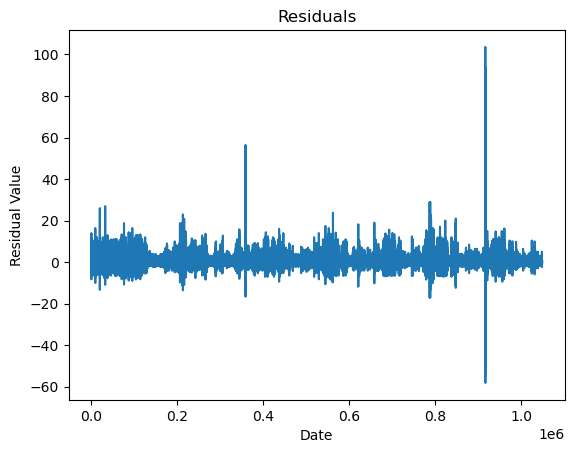

In [12]:
#-------------------------------------------------------MODEL DIAGNOSIS-------------------------------------------------------------
print(results.summary())

# Plot residuals
residuals = results.resid
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.show()

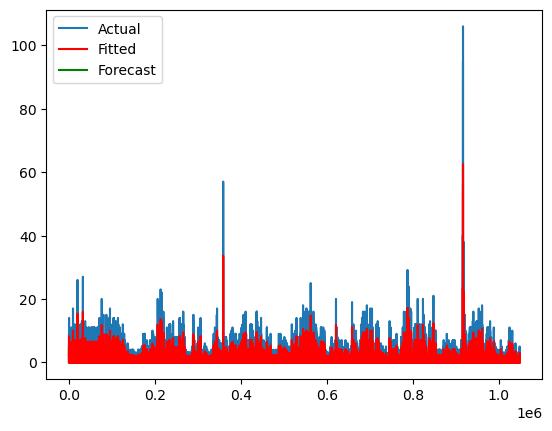

In [13]:
#---------------------------------------------------PREDICTING----------------------------------------------------------------------
forecast_steps = 10
forecast_values = results.get_forecast(steps=forecast_steps).predicted_mean

# Plot original, fitted, and forecasted values
plt.plot(df['Down.Up.Ratio'], label='Actual')
plt.plot(results.fittedvalues, color='red', label='Fitted')
plt.plot(forecast_values, color='green', label='Forecast')
plt.legend()
plt.show()



In [14]:
#----------------------------------------------------------MODEL EVALUATION-----------------------------------------------------------
# Evaluate model performance
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['Down.Up.Ratio'], results.fittedvalues)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 1.330308258111871
